# Trabajo Semanal 8 - Parte de Filtros Digitales

In [1]:
from IPython.display import IFrame
IFrame("./Filtros digitales/TS8 - Filtros Digitales.pdf", width=1000, height=1000)

# Punto 2
## a) Emulación digital de Pasa Bajos butterworth de 2° orden

### Fc = 1kHz, Fs = 100kHz

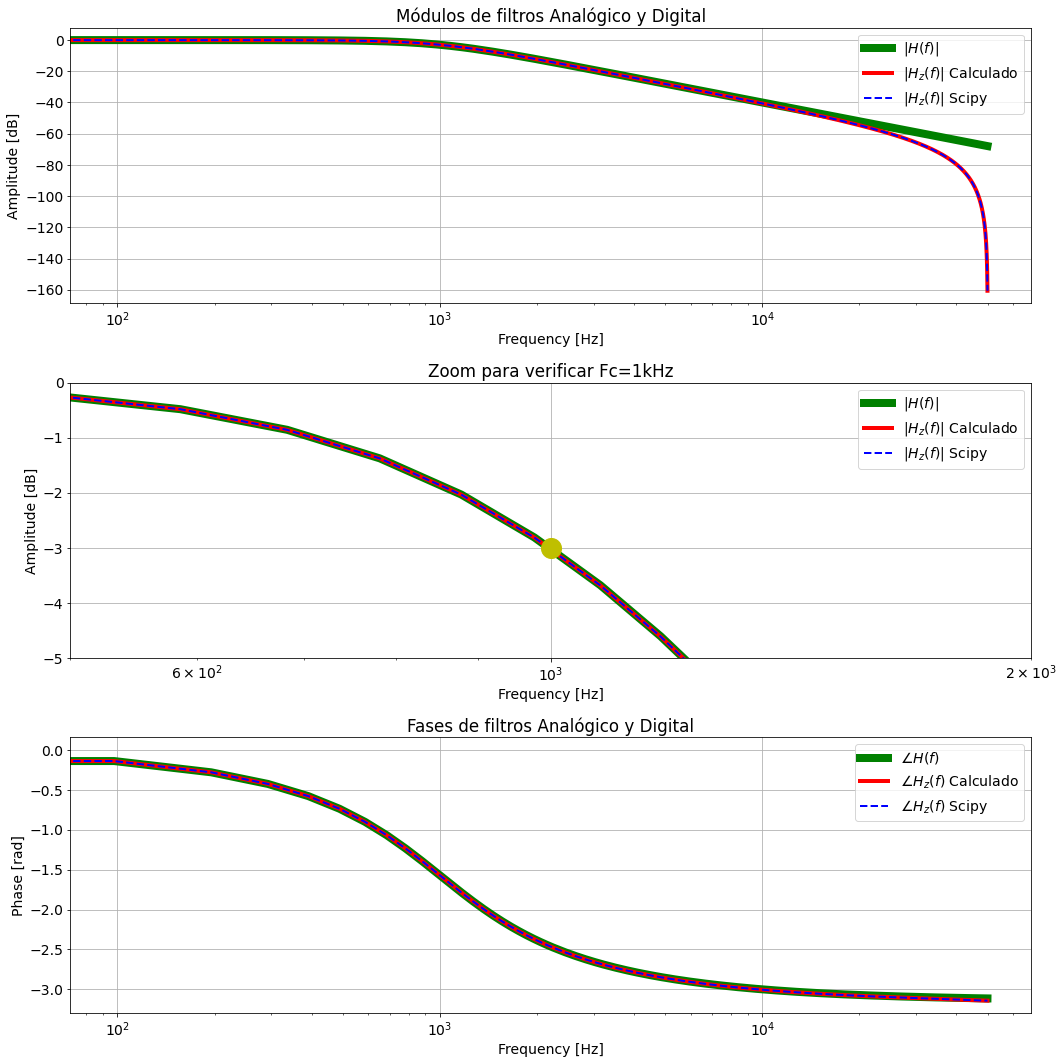

In [17]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import control

plt.rcParams.update({'font.size': 14})

fs = 100e3
fc = 1e3

K = 2*fs

w0 = 2*np.pi*fc

#Coeficientes calculados analíticamente
numz_calc = [w0**2,2*w0**2,w0**2]
denz_calc = [K**2+np.sqrt(2)*K*w0+w0**2, 2*w0**2-2*K**2, K**2+w0**2-np.sqrt(2)*K*w0]

#Obtengo transferencia digital analítica
wz_calc, hz_calc = sig.freqz(numz_calc,denz_calc)

#Obtengo transferencia de butterworth pasabajos de 2°orden
num, den = sig.butter(2, w0, btype='low', analog=True, output='ba')

ws, hs = sig.freqs(num,den, wz_calc*fs)

#Para verificar los coeficientes calculados analíticamente, calculo la bilineal con scipy
numz, denz = sig.bilinear(num, den, fs)

wz, hz = sig.freqz(numz, denz)

fig, ax = plt.subplots(3,1,figsize=(15, 15))
ax[0].set_title('Módulos de filtros Analógico y Digital')
ax[0].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)),'g',linewidth=8.0, label=r'$|H(f)|$')
ax[0].semilogx(wz_calc*fs/(2*np.pi), 20 * np.log10(abs(hz_calc)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
ax[0].semilogx(wz*fs/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax[0].set_ylabel('Amplitude [dB]')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Zoom para verificar Fc=1kHz')
ax[1].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)), 'g',linewidth=8.0, label=r'$|H(f)|$')
ax[1].semilogx(wz_calc*fs/(2*np.pi), 20 * np.log10(abs(hz_calc)), 'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
ax[1].semilogx(wz*fs/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend()
ax[1].grid()
ax[1].set_xlim([5e2, 2e3])
ax[1].set_ylim([-5, 0])
ax[1].plot(1000,-3,'yo', markersize = 20)

ax[2].set_title('Fases de filtros Analógico y Digital')
ax[2].semilogx(ws/(2*np.pi), np.angle(hs),'g',linewidth=8.0, label=r'$∠H(f)$')
ax[2].semilogx(wz_calc*fs/(2*np.pi), np.angle(hz_calc), 'r',linewidth=4.0, label = r'$∠H_z(f)$ Calculado')
ax[2].semilogx(wz*fs/(2*np.pi), np.angle(hz), 'b--',linewidth=2.0, label = r'$∠H_z(f)$ Scipy')
ax[2].set_ylabel('Phase [rad]')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend()
ax[2].grid()

plt.tight_layout()

La transferencia calculada analíticamente y la obtenida en scipy coinciden. El filtro digital se comporta similar al analógico hasta un poco más de 10kHz. Luego de esta frecuencia la $\Omega$ está muy cerca de $pi$ es decir cerca de $\frac{f_s}{2}$ por lo que el módulo se deforma hasta el cero en $Z = -1$ que es cuando $\Omega = pi \Rightarrow f = \frac{f_s}{2}= 50kHz$.

La fase pareciera no tener deformación significativa.

D) No se justifica realizar prewarping dado que se respecta la frecuencia de corte y la distorción ocurre lejos de la banda de paso

(-1.5, 1.5)

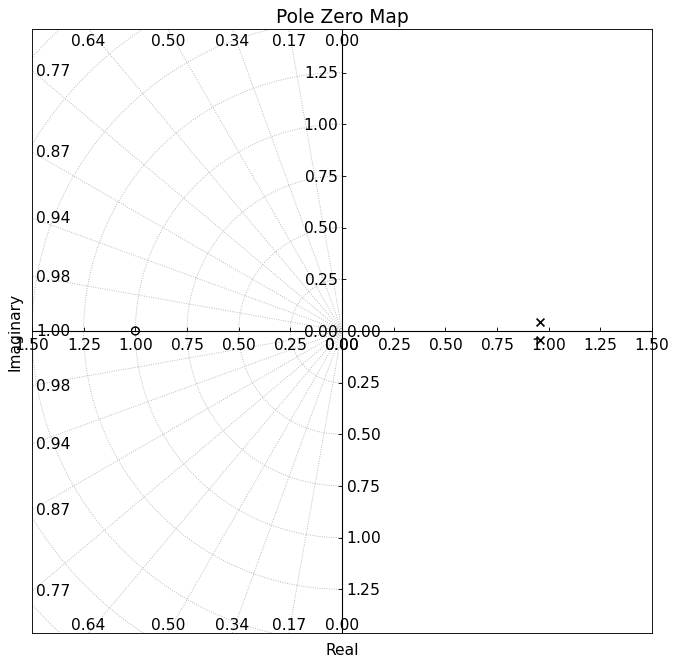

In [18]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

control.pzmap(control.TransferFunction(numz,denz), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

Los ceros en el infinito en Laplace se traducen en ceros en $Z=-1 \Rightarrow \Omega = \pi$

## b) Cambio a Fs = 10kHz

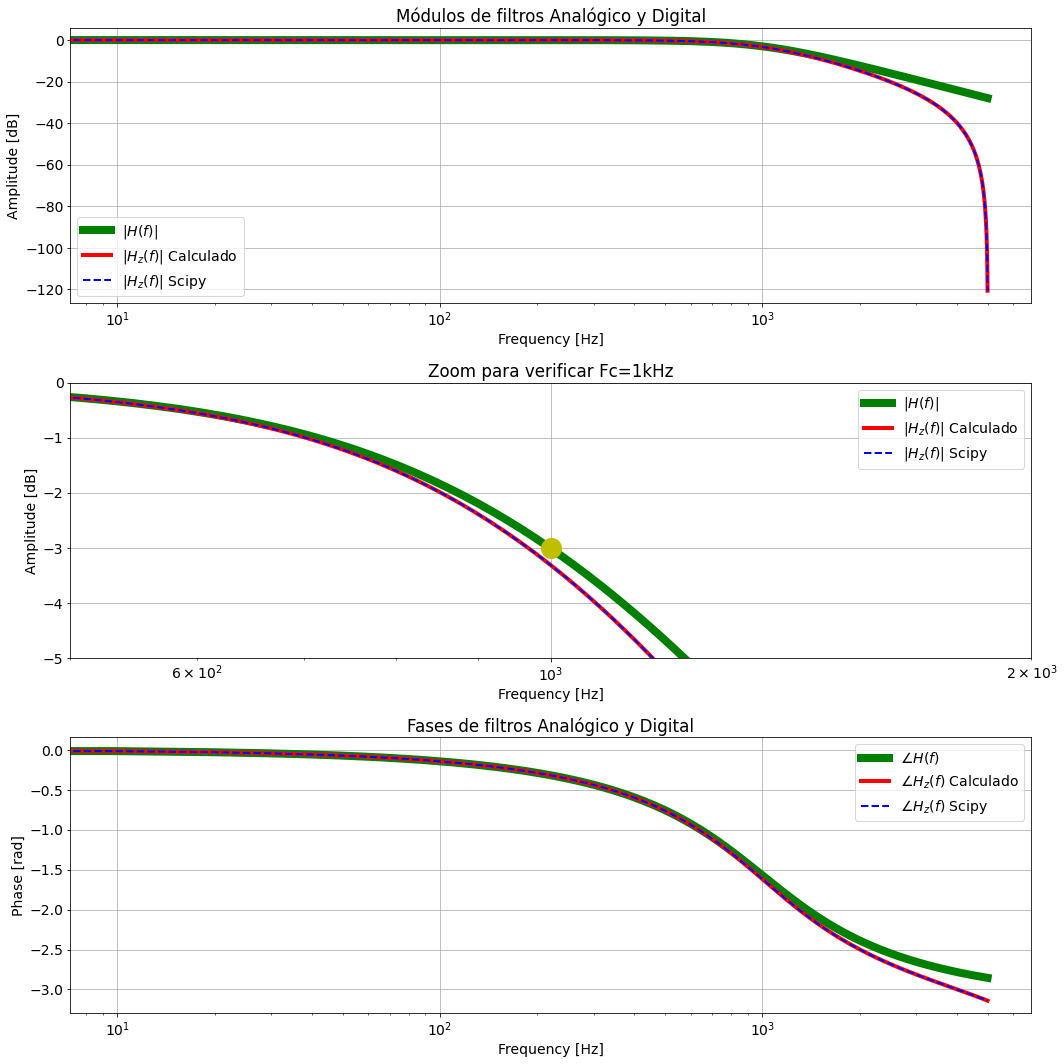

In [19]:
fs = 10e3
fc = 1e3

K = 2*fs

w0 = 2*np.pi*fc

numz_calc = [w0**2,2*w0**2,w0**2]
denz_calc = [K**2+np.sqrt(2)*K*w0+w0**2, 2*w0**2-2*K**2, K**2+w0**2-np.sqrt(2)*K*w0]

wz_calc, hz_calc = sig.freqz(numz_calc,denz_calc)

num, den = sig.butter(2, w0, btype='low', analog=True, output='ba')

ws, hs = sig.freqs(num,den, wz_calc*fs)

numz, denz = sig.bilinear(num, den, fs)

wz, hz = sig.freqz(numz, denz)

fig, ax = plt.subplots(3,1,figsize=(15, 15))
ax[0].set_title('Módulos de filtros Analógico y Digital')
ax[0].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)),'g',linewidth=8.0, label=r'$|H(f)|$')
ax[0].semilogx(wz_calc*fs/(2*np.pi), 20 * np.log10(abs(hz_calc)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
ax[0].semilogx(wz*fs/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax[0].set_ylabel('Amplitude [dB]')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Zoom para verificar Fc=1kHz')
ax[1].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)), 'g',linewidth=8.0, label=r'$|H(f)|$')
ax[1].semilogx(wz_calc*fs/(2*np.pi), 20 * np.log10(abs(hz_calc)), 'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
ax[1].semilogx(wz*fs/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend()
ax[1].grid()
ax[1].set_xlim([5e2, 2e3])
ax[1].set_ylim([-5, 0])
ax[1].plot(1000,-3,'yo', markersize = 20)

ax[2].set_title('Fases de filtros Analógico y Digital')
ax[2].semilogx(ws/(2*np.pi), np.angle(hs),'g',linewidth=8.0, label=r'$∠H(f)$')
ax[2].semilogx(wz_calc*fs/(2*np.pi), np.angle(hz_calc), 'r',linewidth=4.0, label = r'$∠H_z(f)$ Calculado')
ax[2].semilogx(wz*fs/(2*np.pi), np.angle(hz), 'b--',linewidth=2.0, label = r'$∠H_z(f)$ Scipy')
ax[2].set_ylabel('Phase [rad]')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend()
ax[2].grid()

plt.tight_layout()

Al tener la fs más próxima a la fc, el módulo de la transferencia del filtro digital ahora es similar al analógico solo hasta poco antes de la frecuencia de corte de 1kHz, donde luego baja abruptamente al cero ubicado en $\Omega = \pi \Rightarrow f=\frac{f_s}{2} = 5kHz$.

Al deformarse antes, ya no se respetan los -3dB en fc, por lo que podría usarse prewarping y ajustar mínimamente la respuesta.

La fase ahora sí presenta distorsión a partir de los 1000Hz.

(-1.5, 1.5)

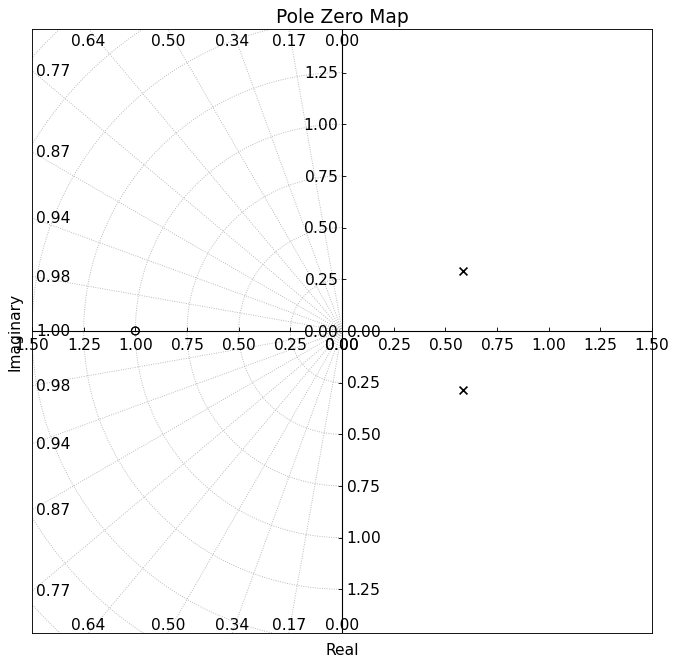

In [20]:
figure(figsize=(10, 10), dpi=80)

control.pzmap(control.TransferFunction(numz,denz), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

Al acercar la fs a la fc, los polos se acercan más a $Z = -1$.

## c) Emulación digital de Pasa Altos Butterworth de 2° orden

## Fc = 6kHz, Fs = 100kHz

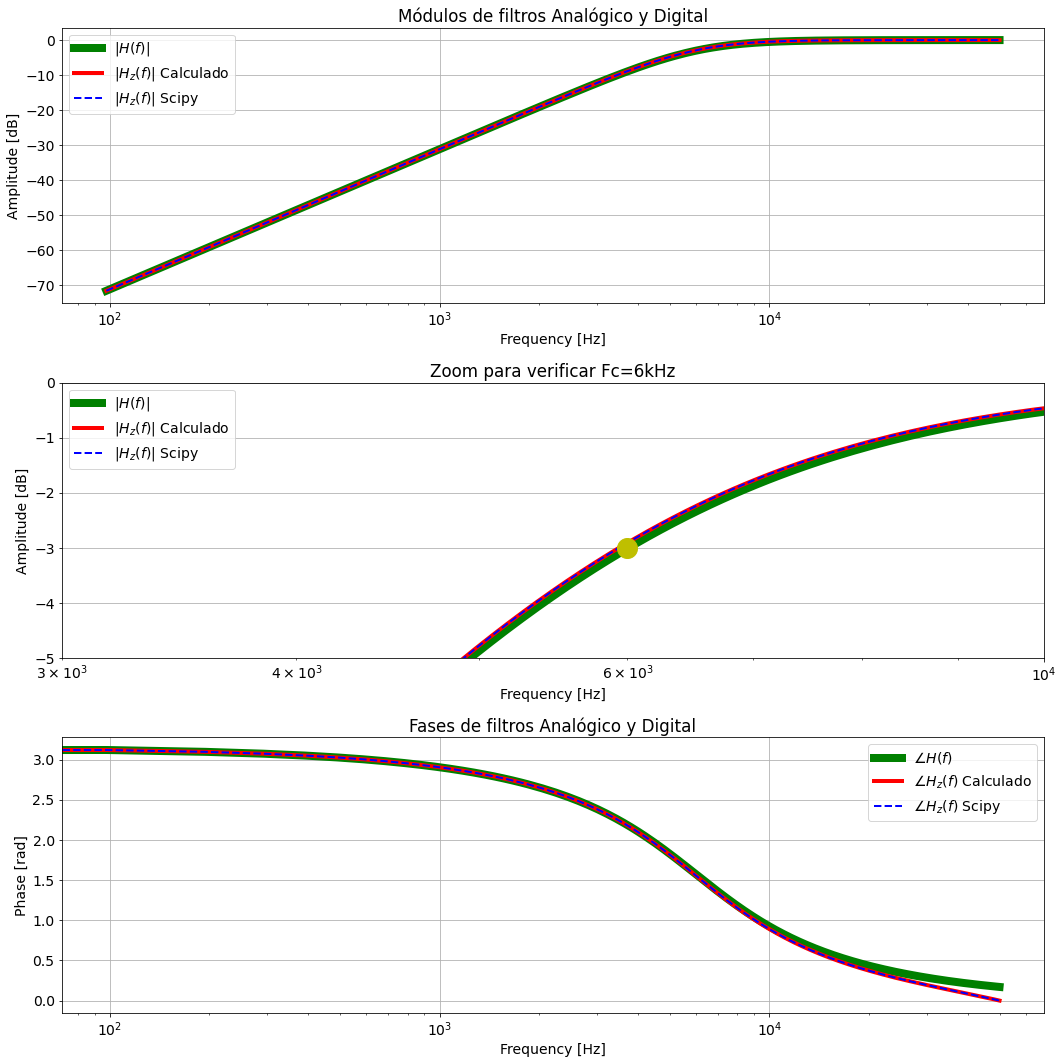

In [21]:
fs = 100e3
fc = 6e3

K = 2*fs/(2*np.pi*fc)

w0 = 2*np.pi*fc

numz_calc = [K**2,-2*K**2,K**2]
denz_calc = [K**2+np.sqrt(2)*K+1, 2-2*K**2, K**2+1-np.sqrt(2)*K]

wz_calc, hz_calc = sig.freqz(numz_calc,denz_calc)

num, den = sig.butter(2, w0, btype='high', analog=True, output='ba')

ws, hs = sig.freqs(num,den, wz_calc*fs)

numz, denz = sig.bilinear(num, den, fs)

wz, hz = sig.freqz(numz, denz)

np.seterr(divide = 'ignore')

fig, ax = plt.subplots(3,1,figsize=(15, 15))
ax[0].set_title('Módulos de filtros Analógico y Digital')
ax[0].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)),'g',linewidth=8.0, label=r'$|H(f)|$')
ax[0].semilogx(wz_calc*fs/(2*np.pi), 20 * np.log10(abs(hz_calc)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
ax[0].semilogx(wz*fs/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax[0].set_ylabel('Amplitude [dB]')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Zoom para verificar Fc=6kHz')
ax[1].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)), 'g',linewidth=8.0, label=r'$|H(f)|$')
ax[1].semilogx(wz_calc*fs/(2*np.pi), 20 * np.log10(abs(hz_calc)), 'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
ax[1].semilogx(wz*fs/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend()
ax[1].grid()
ax[1].set_xlim([3e3, 10e3])
ax[1].set_ylim([-5, 0])
ax[1].plot(6000,-3,'yo', markersize = 20)

ax[2].set_title('Fases de filtros Analógico y Digital')
ax[2].semilogx(ws/(2*np.pi), np.angle(hs),'g',linewidth=8.0, label=r'$∠H(f)$')
ax[2].semilogx(wz_calc*fs/(2*np.pi), np.angle(hz_calc), 'r',linewidth=4.0, label = r'$∠H_z(f)$ Calculado')
ax[2].semilogx(wz*fs/(2*np.pi), np.angle(hz), 'b--',linewidth=2.0, label = r'$∠H_z(f)$ Scipy')
ax[2].set_ylabel('Phase [rad]')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend()
ax[2].grid()

plt.tight_layout()

Respecto del módulo no hay notables diferencias. A los 6kHz se tiene poco más de 3dB pero es un error muy leve, dado que la fs es lejana a la fc. Podría usarse prewarping para corregir ese mínimo error, sin riesgo a distorsionar el resto de la transferencia.

En la fase si hay una diferencia perceptible a partir de los 10kHz.

(-1.5, 1.5)

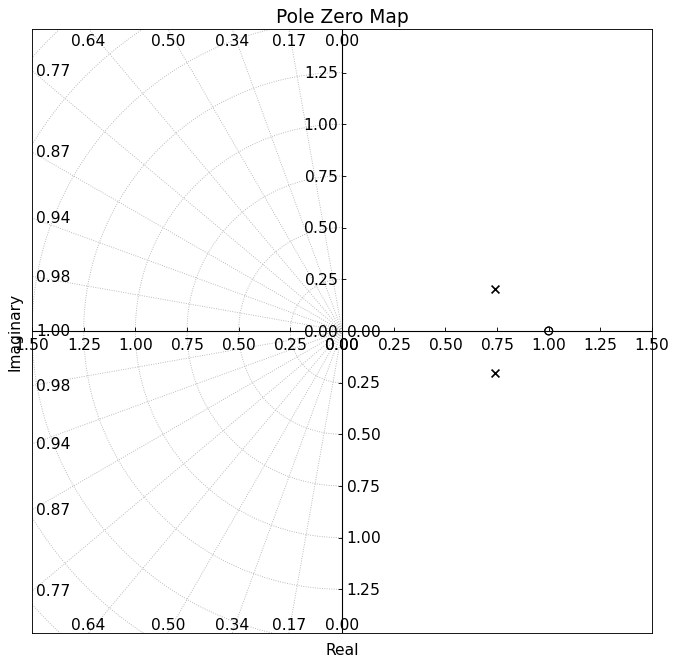

In [22]:
figure(figsize=(10, 10), dpi=80)

control.pzmap(control.TransferFunction(numz,denz), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

Los ceros en el origen en Laplace se traducen en ceros en $Z=1 \Rightarrow \Omega = 0$

## Cambio a Fs = 10kHz

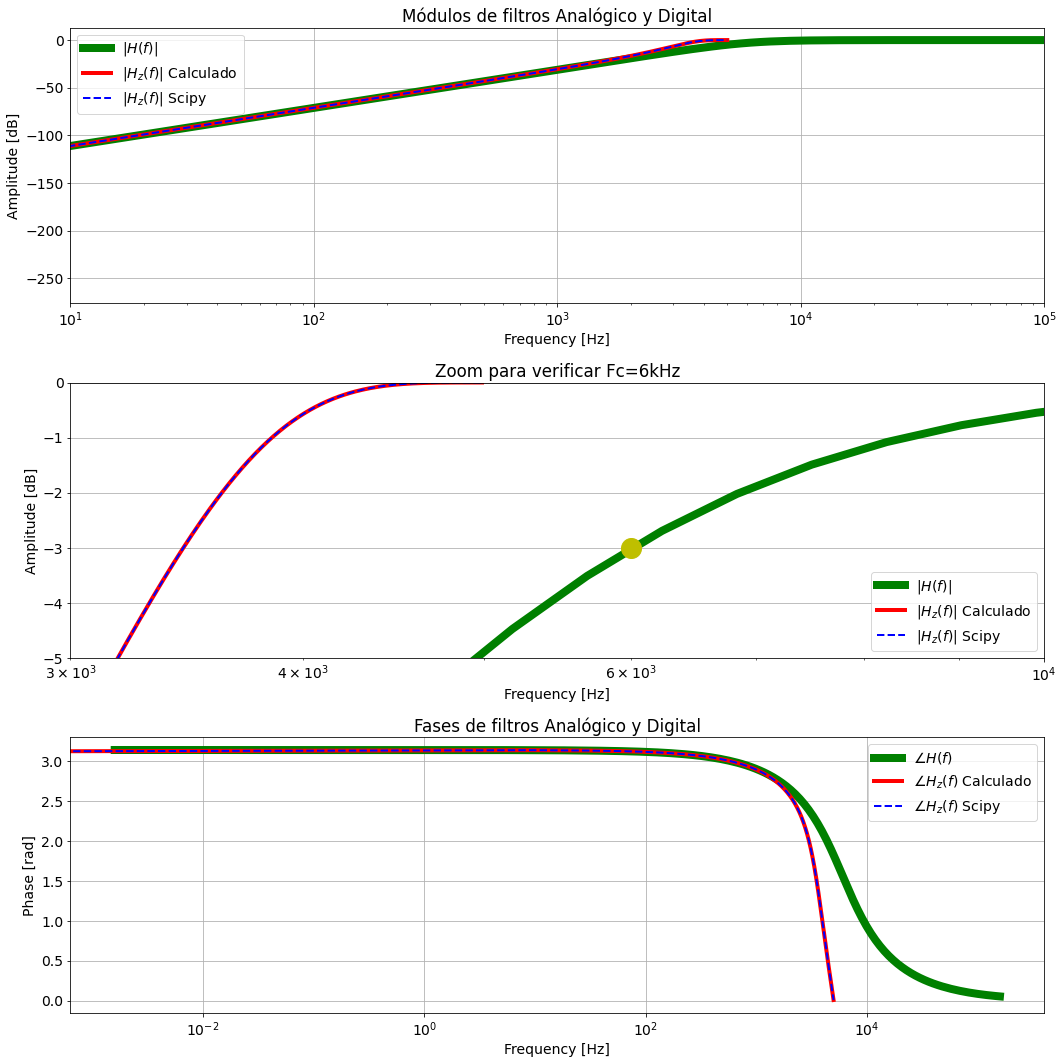

In [23]:
fs = 10e3
fc = 6e3

K = 2*fs/(2*np.pi*fc)

w0 = 2*np.pi*fc

num, den = sig.butter(2, w0, btype='high', analog=True, output='ba')

ws, hs = sig.freqs(num,den)

numz_calc = [K**2,-2*K**2,K**2]
denz_calc = [K**2+np.sqrt(2)*K+1, 2-2*K**2, K**2+1-np.sqrt(2)*K]

wz_calc, hz_calc = sig.freqz(numz_calc,denz_calc)

numz, denz = sig.bilinear(num, den, fs)

wz, hz = sig.freqz(numz, denz, wz_calc)

np.seterr(divide = 'ignore')

fig, ax = plt.subplots(3,1,figsize=(15, 15))
ax[0].set_title('Módulos de filtros Analógico y Digital')
ax[0].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)),'g',linewidth=8.0, label=r'$|H(f)|$')
ax[0].semilogx(wz_calc*fs/(2*np.pi), 20 * np.log10(abs(hz_calc)),'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
ax[0].semilogx(wz*fs/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax[0].set_ylabel('Amplitude [dB]')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].legend()
ax[0].grid()
ax[0].set_xlim([1e1, 1e5])

ax[1].set_title('Zoom para verificar Fc=6kHz')
ax[1].semilogx(ws/(2*np.pi), 20 * np.log10(abs(hs)), 'g',linewidth=8.0, label=r'$|H(f)|$')
ax[1].semilogx(wz_calc*fs/(2*np.pi), 20 * np.log10(abs(hz_calc)), 'r',linewidth=4.0, label = r'$|H_z(f)|$ Calculado')
ax[1].semilogx(wz*fs/(2*np.pi), 20 * np.log10(abs(hz)), 'b--',linewidth=2.0, label = r'$|H_z(f)|$ Scipy')
ax[1].set_ylabel('Amplitude [dB]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend()
ax[1].grid()
ax[1].set_xlim([3e3, 10e3])
ax[1].set_ylim([-5, 0])
ax[1].plot(6000,-3,'yo', markersize = 20)

ax[2].set_title('Fases de filtros Analógico y Digital')
ax[2].semilogx(ws/(2*np.pi), np.angle(hs),'g',linewidth=8.0, label=r'$∠H(f)$')
ax[2].semilogx(wz_calc*fs/(2*np.pi), np.angle(hz_calc), 'r',linewidth=4.0, label = r'$∠H_z(f)$ Calculado')
ax[2].semilogx(wz*fs/(2*np.pi), np.angle(hz), 'b--',linewidth=2.0, label = r'$∠H_z(f)$ Scipy')
ax[2].set_ylabel('Phase [rad]')
ax[2].set_xlabel('Frequency [Hz]')
ax[2].legend()
ax[2].grid()

plt.tight_layout()

La frecuencia de muestreo $f_s = 10kHz$ está demasiado cerca de la frecuencia de corte $f_c=6kHz$, por lo que la deformación a partir de los 2kHz es muy notoria. A los 5kHz ya se llegó a los 0dB, y no se puede seguir la transferencia puesto que esta es la frecuencia de Nyquist $\frac{f_s}{2}=5kHz < f_c=6kHz$. En otras palabras, con este muestreo no se puede llegar jamás a muestrear señales en la banda de paso del filtro digital. (Error de diseño)

D) No tiene sentido usar prewarping, porque no se puede alcanzar la frecuencia de paso del filtro.

(-1.5, 1.5)

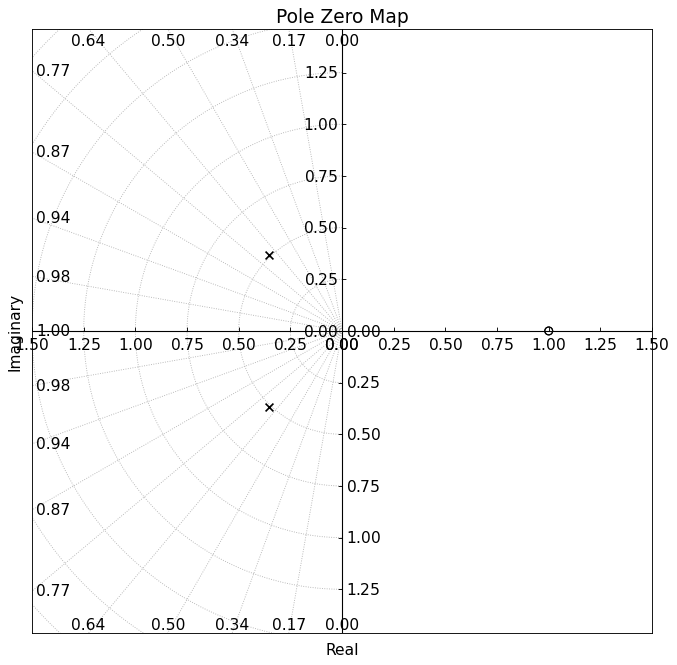

In [24]:
figure(figsize=(10, 10), dpi=80)

control.pzmap(control.TransferFunction(numz,denz), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

# Punto 3
## Respuesta de módulo y fase de filtros FIR
## a) Filtro de media móvil

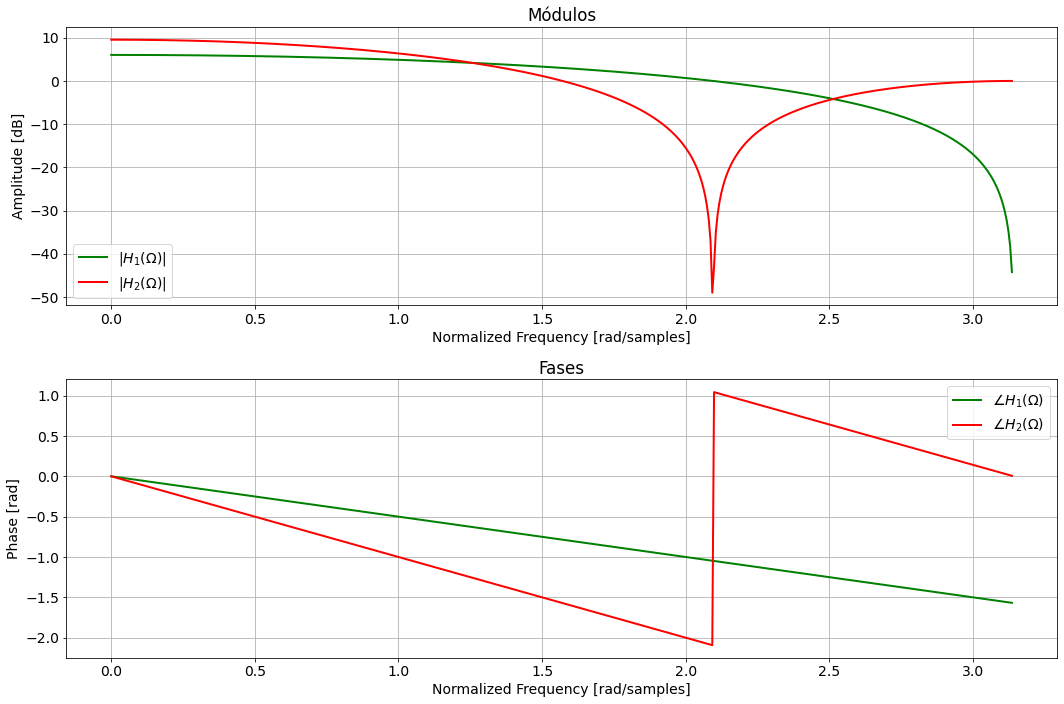

In [25]:
numz_1 = [1,1]
denz_1 = [1]
wz_1, hz_1 = sig.freqz(numz_1,denz_1)

numz_2 = [1,1,1]
denz_2 = [1]
wz_2, hz_2 = sig.freqz(numz_2,denz_2)

fig, ax = plt.subplots(2,1,figsize=(15, 10))
ax[0].set_title('Módulos')
ax[0].plot(wz_1, 20 * np.log10(abs(hz_1)),'g',linewidth=2.0, label=r'$|H_1(\Omega)|$')
ax[0].plot(wz_2, 20 * np.log10(abs(hz_2)),'r',linewidth=2.0, label = r'$|H_2(\Omega)|$')
ax[0].set_ylabel('Amplitude [dB]')
ax[0].set_xlabel('Normalized Frequency [rad/samples]')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Fases')
ax[1].plot(wz_1, np.angle(hz_1), 'g',linewidth=2.0, label=r'$∠H_1(\Omega)$')
ax[1].plot(wz_2, np.angle(hz_2), 'r',linewidth=2.0, label = r'$∠H_2(\Omega)$')
ax[1].set_ylabel('Phase [rad]')
ax[1].set_xlabel('Normalized Frequency [rad/samples]')
ax[1].legend()
ax[1].grid()

plt.tight_layout()

(-1.5, 1.5)

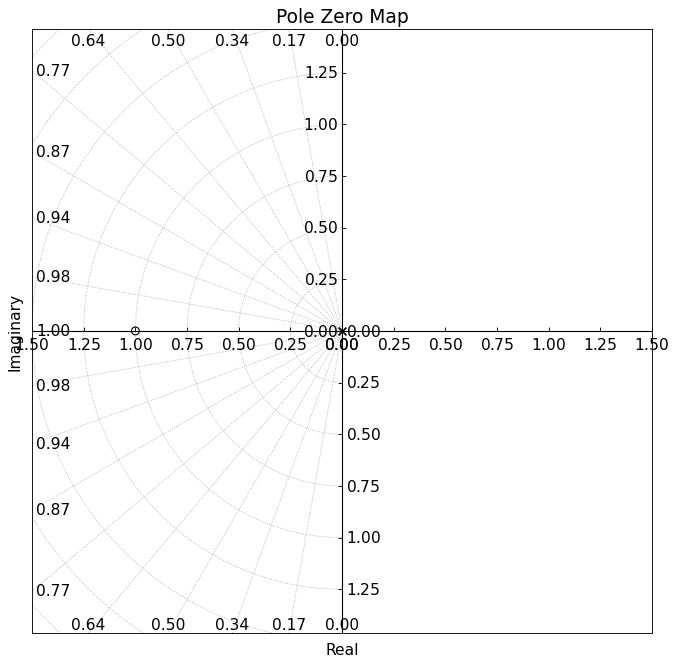

In [35]:
figure(figsize=(10, 10), dpi=80)

control.pzmap(control.TransferFunction([1,1],[1,0]), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

(-1.5, 1.5)

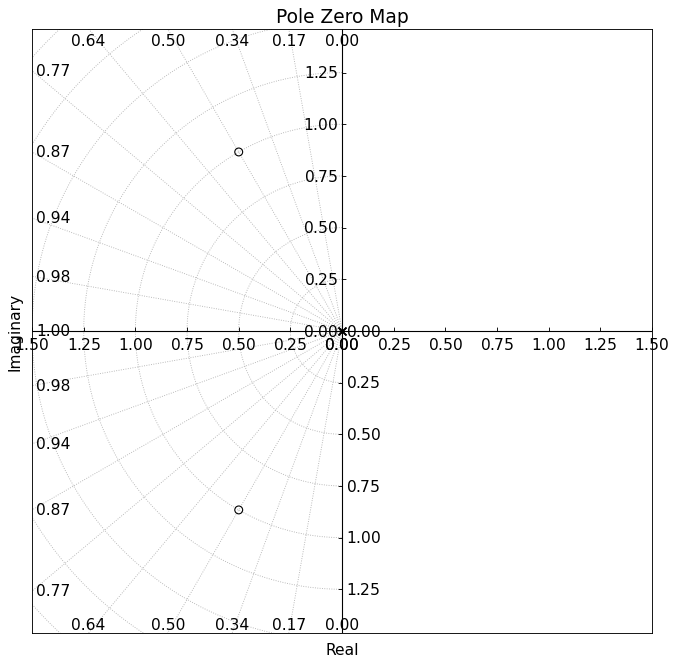

In [36]:
figure(figsize=(10, 10), dpi=80)

control.pzmap(control.TransferFunction([1,1,1],[1,0,0]), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

### Verificación de que fs debe ser de 150Hz para eliminar 50Hz con H2(z):

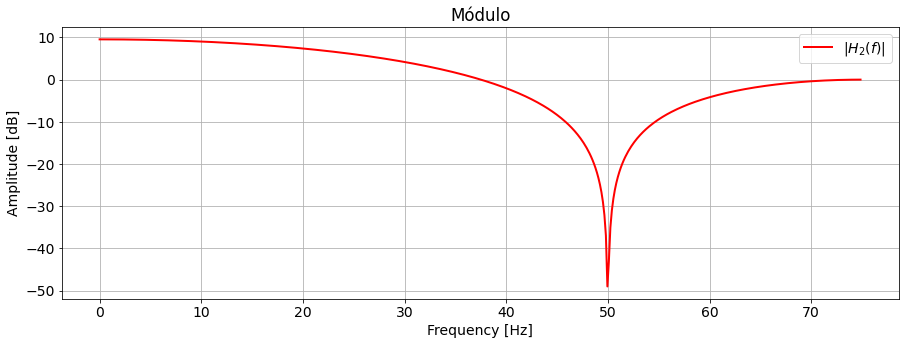

In [28]:
fs = 150

fig, ax = plt.subplots(1,1,figsize=(15, 5))
ax.set_title('Módulo')
ax.plot(wz_2*fs/(2*np.pi), 20 * np.log10(abs(hz_2)),'r',linewidth=2.0, label = r'$|H_2(f)|$')
ax.set_ylabel('Amplitude [dB]')
ax.set_xlabel('Frequency [Hz]')
ax.legend()
ax.grid()

## b)Filtro Diferenciador

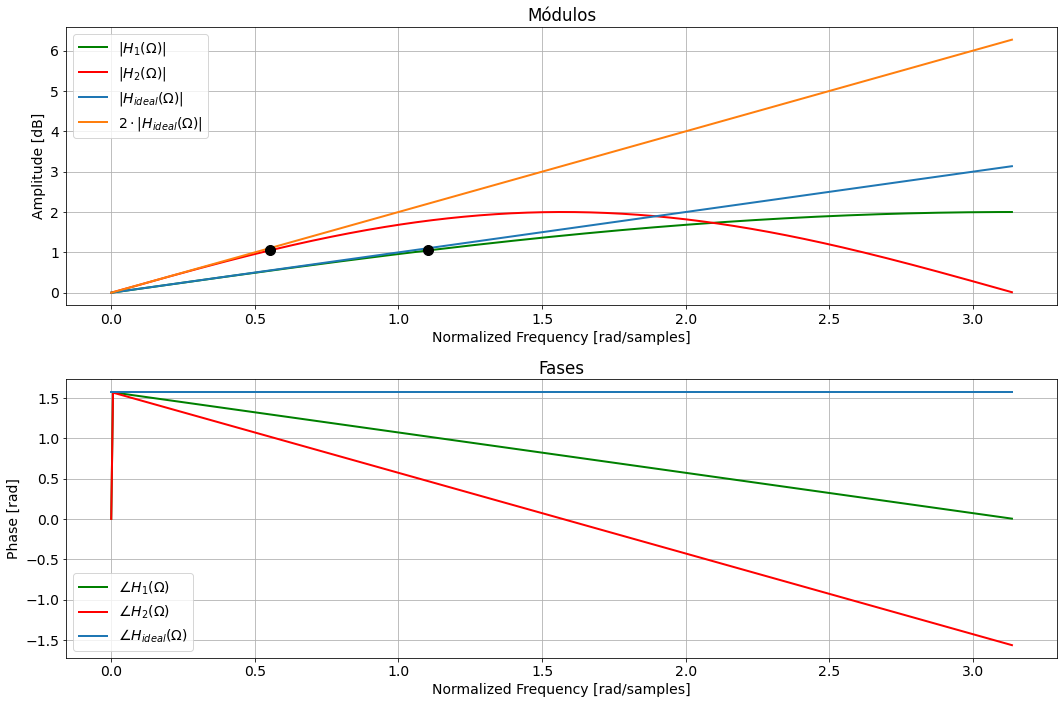

In [29]:
numz_1 = [1,-1]
denz_1 = [1]
wz_1, hz_1 = sig.freqz(numz_1,denz_1)

numz_2 = [1,0,-1]
denz_2 = [1]
wz_2, hz_2 = sig.freqz(numz_2,denz_2)

fig, ax = plt.subplots(2,1,figsize=(15, 10))
ax[0].set_title('Módulos')
ax[0].plot(wz_1, abs(hz_1),'g',linewidth=2.0, label=r'$|H_1(\Omega)|$')
ax[0].plot(wz_2, abs(hz_2),'r',linewidth=2.0, label = r'$|H_2(\Omega)|$')
ax[0].plot(wz_1, wz_1, linewidth=2.0, label=r'$|H_{ideal}(\Omega)|$')
ax[0].plot(wz_1, 2*wz_1, linewidth=2.0, label=r'$2\cdot|H_{ideal}(\Omega)|$')
ax[0].plot(0.551911,1.0486309, 'ko', markersize = 10)
ax[0].plot(1.10382,1.0486292, 'ko', markersize = 10)
ax[0].set_ylabel('Amplitude [dB]')
ax[0].set_xlabel('Normalized Frequency [rad/samples]')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Fases')
ax[1].plot(wz_1, np.angle(hz_1), 'g',linewidth=2.0, label=r'$∠H_1(\Omega)$')
ax[1].plot(wz_2, np.angle(hz_2), 'r',linewidth=2.0, label = r'$∠H_2(\Omega)$')
ax[1].plot(wz_1, np.ones_like(wz_1)*np.pi/2,linewidth=2.0, label = r'$∠H_{ideal}(\Omega)$')
ax[1].set_ylabel('Phase [rad]')
ax[1].set_xlabel('Normalized Frequency [rad/samples]')
ax[1].legend()
ax[1].grid()

plt.tight_layout()

(-1.5, 1.5)

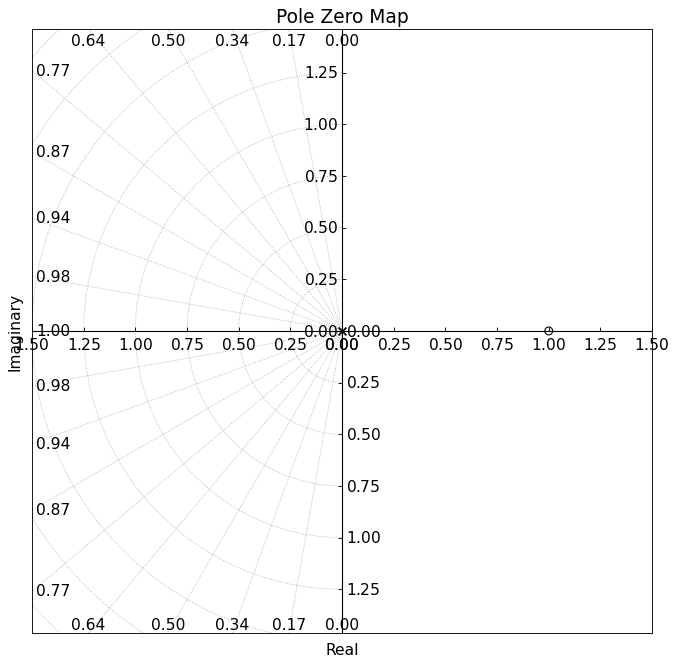

In [37]:
figure(figsize=(10, 10), dpi=80)

control.pzmap(control.TransferFunction([1,-1],[1,0]), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

(-1.5, 1.5)

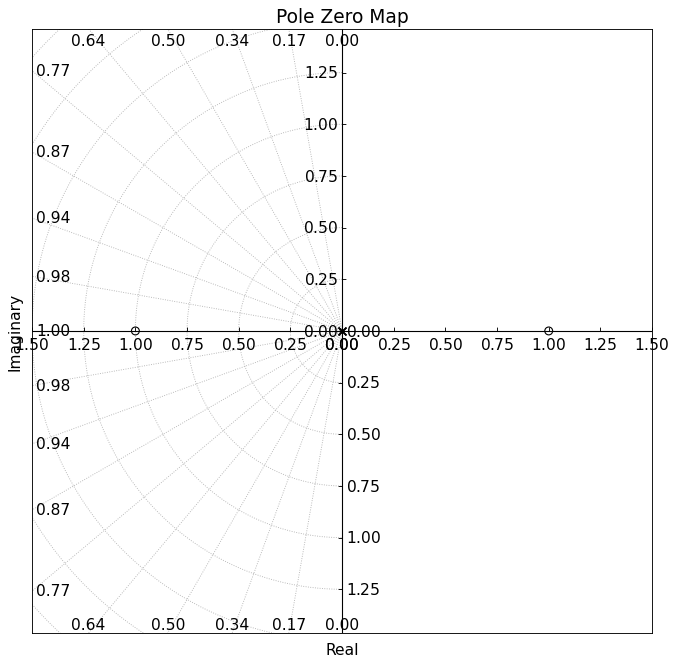

In [38]:
figure(figsize=(10, 10), dpi=80)

control.pzmap(control.TransferFunction([1,0,-1],[1,0,0]), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])

# Tarea Semanal 8 - Parte de cuadripolos y MAI

In [61]:
IFrame("./Cuadripolos y MAI/TS8 - Cuadripolos y MAI.pdf", width=1000, height=1000)

## Verificación circuital de transferencia
Para la verificación con la simulación circuital, uso la biblioteca "ltspice" que me permite fácilmente obtener las curvas de AC_analysis hechas en LTspice.

El circuito simulado es el siguiente:
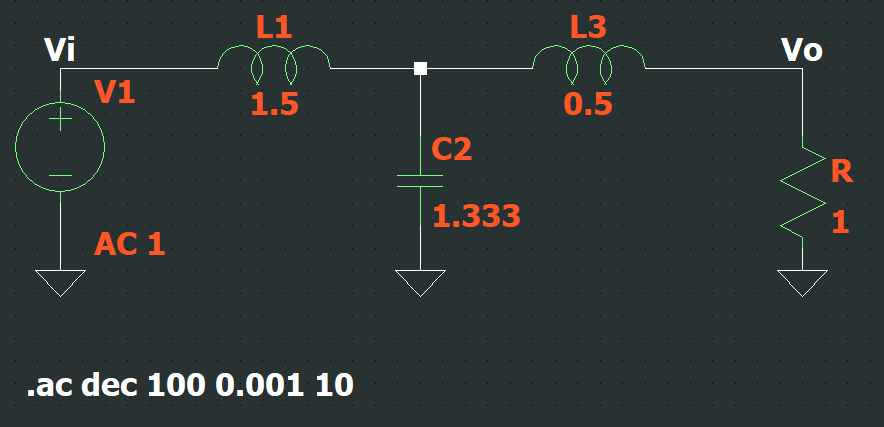

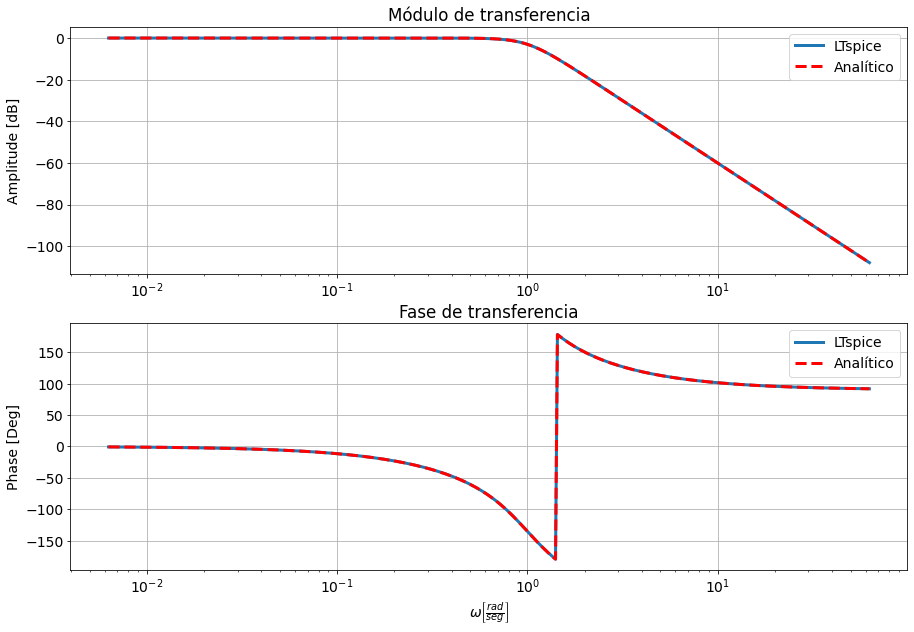

In [60]:
import ltspice
import matplotlib.pyplot as plt
import numpy as np
import os

l = ltspice.Ltspice("./Cuadripolos y MAI/Circuito.raw")
l.parse()

fig, axes = plt.subplots(2, 1, figsize=(15,10))

#Obtengo curvas de simulación en ltspice

freq = l.get_frequency()
V_out = l.get_data('V(vo)')

Vout_amplitude = 20 * np.log10(np.abs(V_out))
Vout_angle = np.angle(V_out, deg=True)

#Obtengo curvas de cálculo analítico usando los coeficientes obtenidos
num = [1]
den = [1,2,2,1]
w, h = sig.freqs(num,den,freq*2*np.pi)
    
axes[0].semilogx(freq*2*np.pi, Vout_amplitude, linewidth=3.0, label='LTspice')
axes[0].semilogx(w, 20*np.log10(np.abs(h)), 'r--', linewidth=3.0, label='Analítico')
axes[1].semilogx(freq*2*np.pi, Vout_angle, linewidth=3.0, label='LTspice')
axes[1].semilogx(w, np.angle(h, deg=True), 'r--', linewidth=3.0, label='Analítico')
axes[0].grid()
axes[1].grid()
axes[0].set_title("Módulo de transferencia")
axes[1].set_title("Fase de transferencia")
axes[1].set_xlabel(r'$\omega \left[\frac{rad}{seg}\right]$')
axes[0].set_ylabel("Amplitude [dB]")
axes[1].set_ylabel("Phase [Deg]")
#plt.savefig("ac.png")
axes[0].legend()
axes[1].legend()
plt.show()

Se puede observar que coincide perfectamente el desarrollo analítico con la simulación circuital

(-1.5, 1.5)

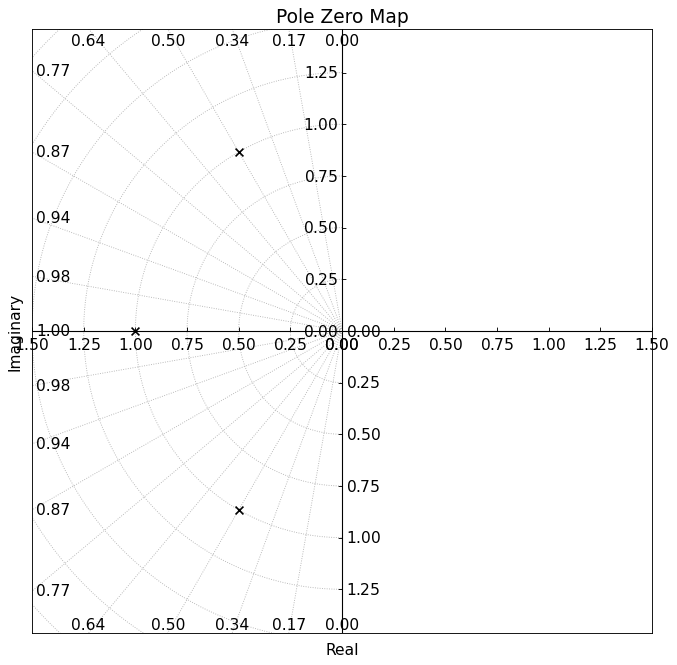

In [55]:
figure(figsize=(10, 10), dpi=80)

control.pzmap(control.TransferFunction(num,den), grid = True)
plt.gca().set_xlim([-1.5,1.5])
plt.gca().set_ylim([-1.5,1.5])